In [10]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
#%matplotlib inline

In [11]:
df = pd.read_csv('./archive/data.csv')
df.head()

,Position,Track Name,Artist,Streams,URL,Date,Region
0,1,Reggaetón Lento (Bailemos),CNCO,19272,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,ec
1,2,Chantaje,Shakira,19270,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-01,ec
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,https://open.spotify.com/track/3QwBODjSEzelZyV...,2017-01-01,ec
3,4,Vente Pa' Ca,Ricky Martin,14954,https://open.spotify.com/track/7DM4BPaS7uofFul...,2017-01-01,ec
4,5,Safari,J Balvin,14269,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,2017-01-01,ec


In [12]:
df["Track Name"]

0          Reggaetón Lento (Bailemos)
1                            Chantaje
2           Otra Vez (feat. J Balvin)
3                        Vente Pa' Ca
4                              Safari
                      ...            
3441192            More Than You Know
3441193                        Issues
3441194                   Tuo Fei Lun
3441195                            面具
3441196                    Let Her Go
Name: Track Name, Length: 3441197, dtype: object

In [13]:
df["Region"]

0          ec
1          ec
2          ec
3          ec
4          ec
           ..
3441192    hk
3441193    hk
3441194    hk
3441195    hk
3441196    hk
Name: Region, Length: 3441197, dtype: object

In [14]:
G = nx.Graph()

In [15]:
from datetime import date, datetime

Songs = {}
Songs.update({"song": 0})

SongDate = {}

def consecutiveDate(date, prevDate):
    if prevDate == None:
        return False
    
    dates = [datetime.strptime(date, "%Y-%m-%d"), datetime.strptime(prevDate, "%Y-%m-%d")]

    date_ints = set(d.toordinal() for d in dates)

    if max(date_ints) - min(date_ints) == len(date_ints) - 1: 
        return True
    
    return False
    


i = 0 
for row in df.index:
    #print(df["Track Name"][row], df["Region"][row]
    i = i + 1

    if Songs.get(df["Track Name"][row]) != None and consecutiveDate(df["Date"][row], SongDate.get(df["Track Name"][row])):
        #add to value
        newValue = Songs.get(df["Track Name"][row]) + 1
        Songs.update({df["Track Name"][row]: newValue})
    else:
        Songs.update({df["Track Name"][row]: 1})

    SongDate.update({df["Track Name"][row]: df["Date"][row]})

    if i == 365000:
        break

songKeys = Songs.keys()

for i in songKeys:
    #print(i)
    if Songs.get(i) >= 30: 
        G.add_node(i)


#for a in SongDate.items():
    #print(a)

In [16]:
print(G.number_of_nodes())
list(G)

503


['Reggaetón Lento (Bailemos)',
 'Otra Vez (feat. J Balvin)',
 "Vente Pa' Ca",
 'La Bicicleta',
 'Ay Mi Dios',
 'Andas En Mi Cabeza',
 'Traicionera',
 'Vacaciones',
 'Borro Cassette',
 "Don't Wanna Know",
 'Me Llamas (feat. Maluma) - Remix',
 'My Way',
 'Enamorándonos',
 'Te Quiero Pa´Mi',
 'Hasta Que Se Seque el Malecón - Remix',
 'Diles (feat. Arcangel, Nengo Flow, Dj Luian & Mambo Kings)',
 'Ruleta Rusa',
 'Traicionera - Remix',
 'El Perdedor - The Remix',
 'De Pies a Cabeza',
 'El Chisme',
 'Mi Tesoro (feat. Nicky Jam)',
 'Sola (Remix) [feat. Daddy Yankee, Wisin, Farruko, Zion & Lennox]',
 'Acércate (feat. Nicky Jam) - Remix',
 'Bajo el agua',
 'Una y otra vez',
 'Caraluna',
 'Tu No Vive Asi (feat. Mambo Kingz & DJ Luian)',
 'Sin Contrato - Remix',
 'Fake Love',
 'Otra Copa (feat. Farruko)',
 'Vuelve',
 'Sucker For Pain (with Wiz Khalifa, Imagine Dragons, Logic & Ty Dolla $ign feat. X Ambassadors)',
 'Caminar de Tu Mano',
 'Llegaste tú (feat. Reykon)',
 'Cómo Te Atreves',
 'Love Me 

In [17]:
i = 0 
for row in df.index:
    #print(df["Track Name"][row], df["Region"][row]
    i = i + 1

    if df["Track Name"][row] in G.nodes:
        G.add_edge(df["Track Name"][row], df["Region"][row])

    if i == 365000:
        break

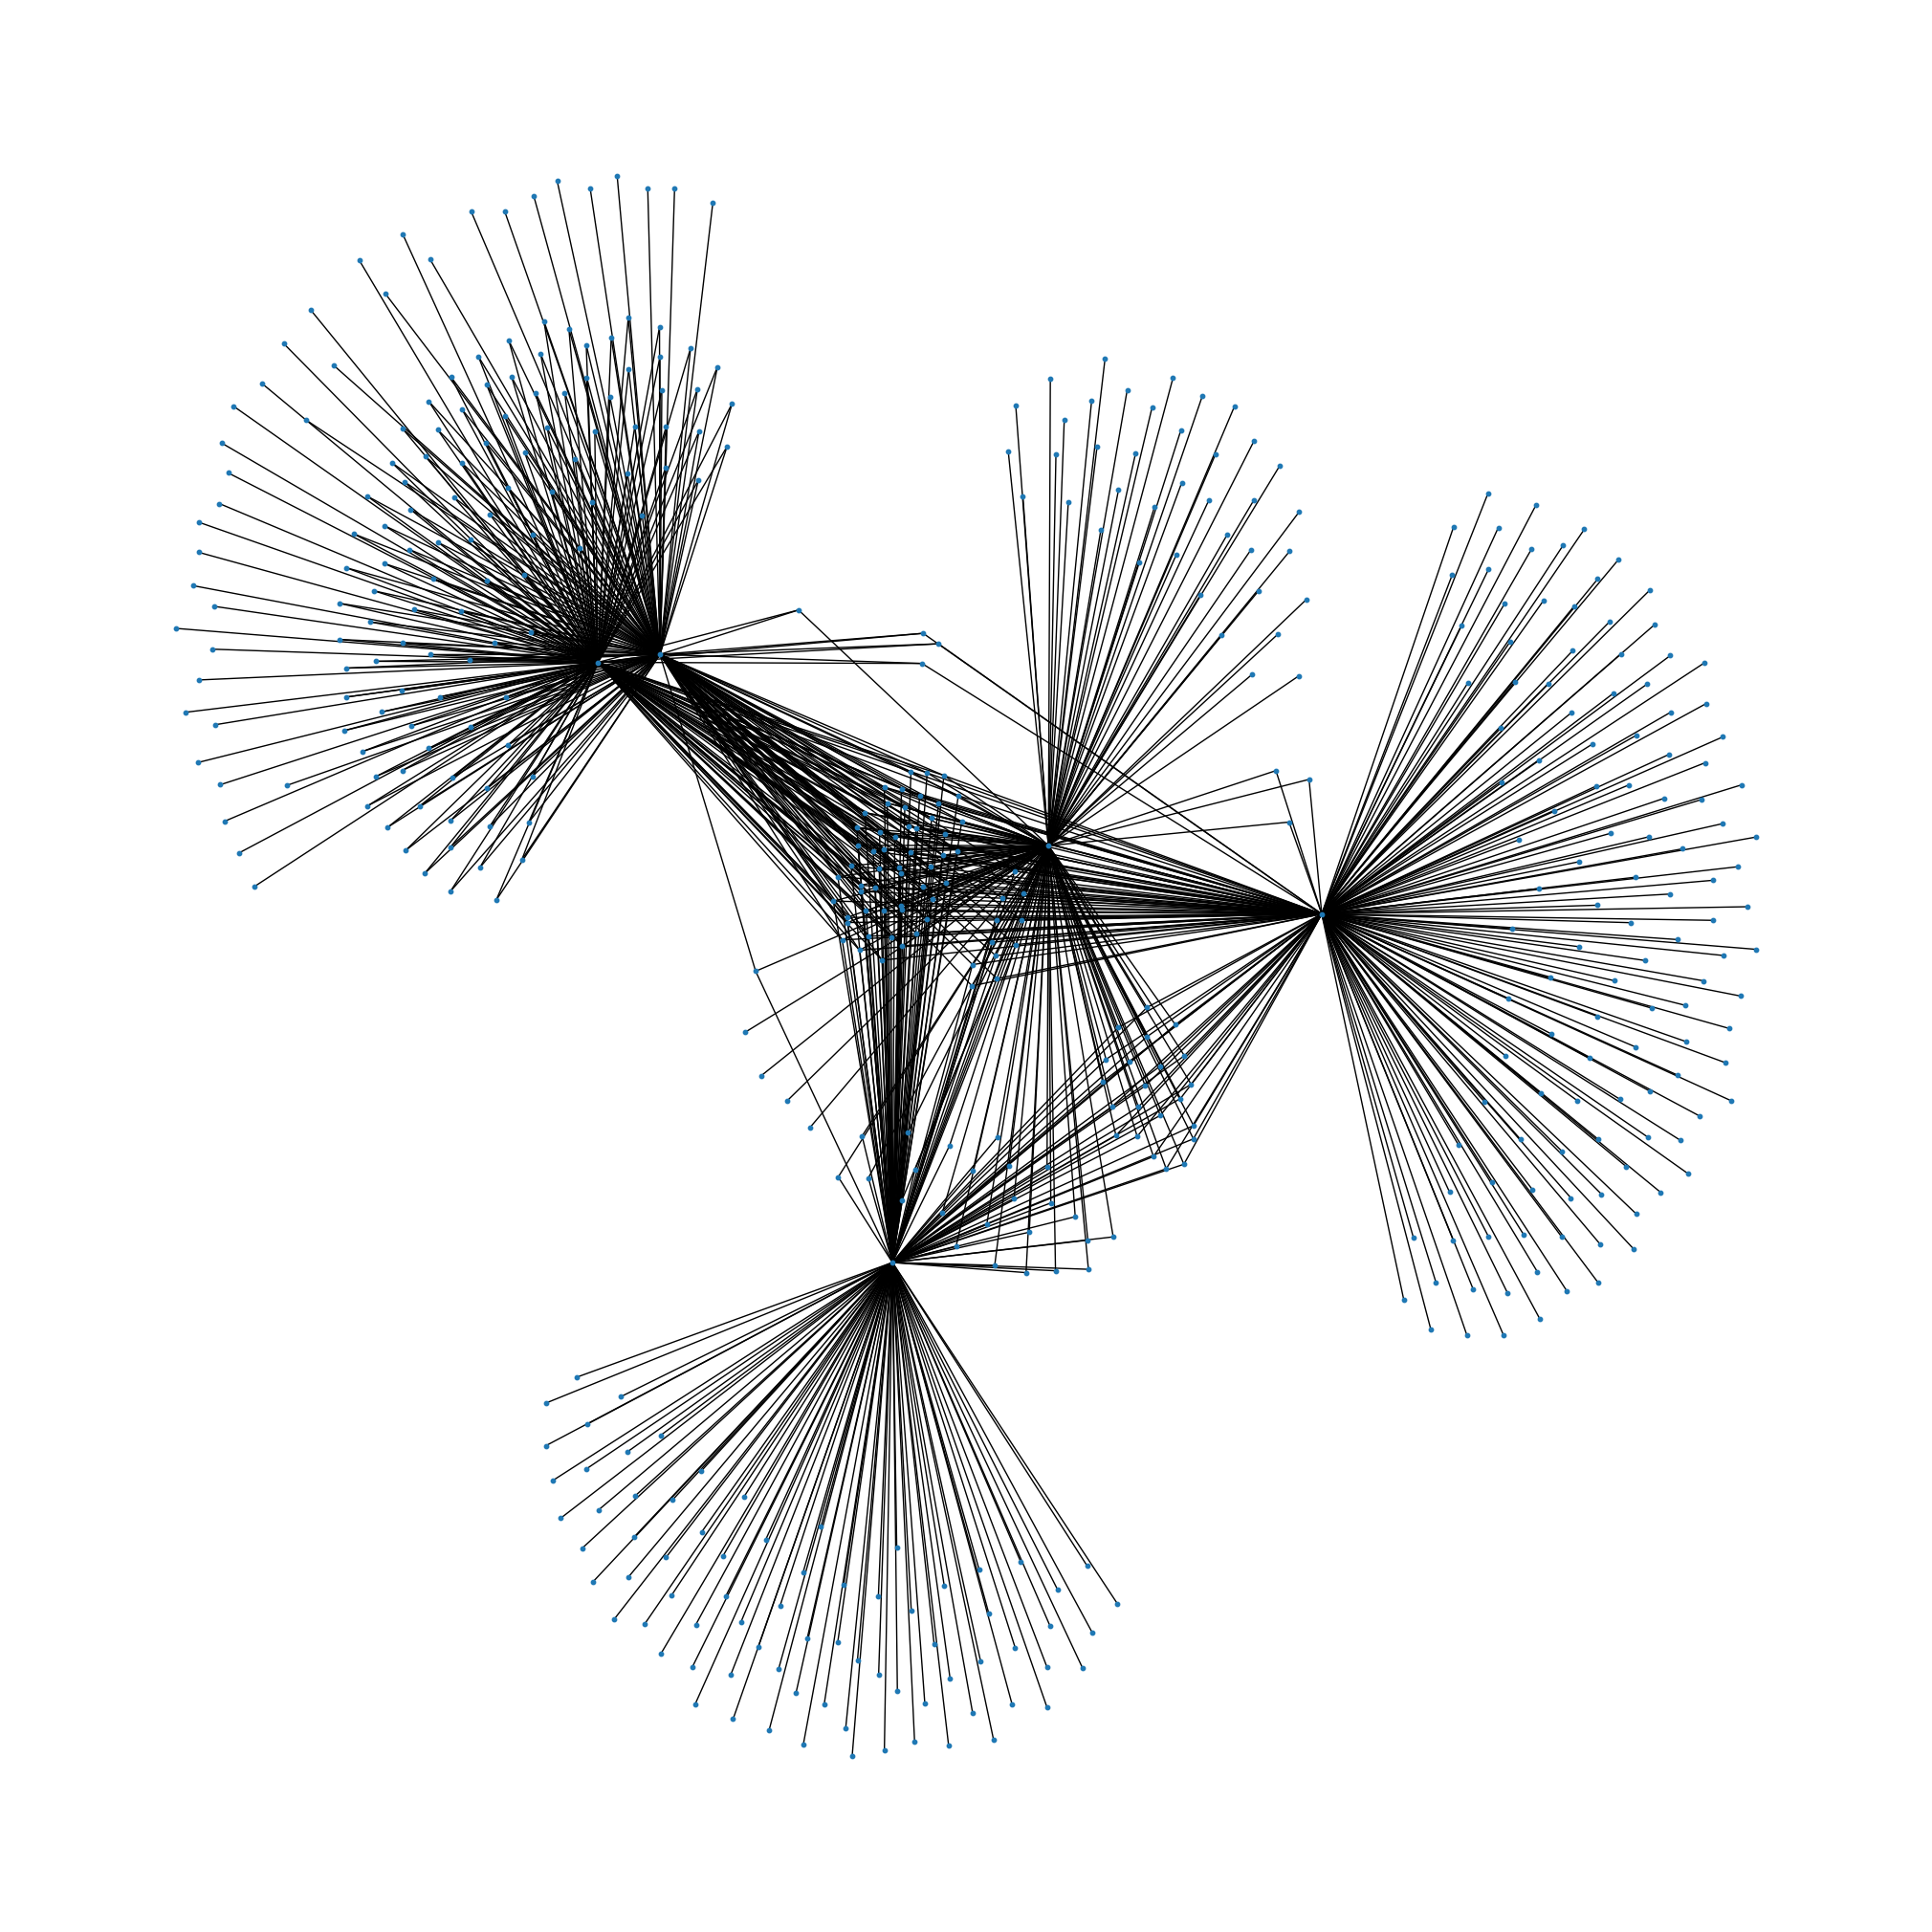

In [18]:
fig = plt.figure(figsize=(20,20))
nx.draw_spring(G, node_size=10)